# 非線形回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

In [3]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


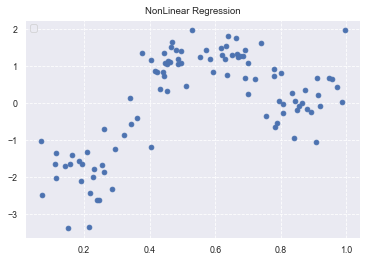

In [4]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

## 線形回帰

0.3043596177616854


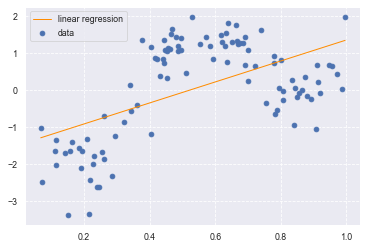

In [5]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

## 非線形回帰

### L2/Ridge正則化

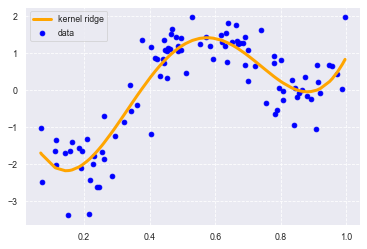

In [6]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

0.8145459733275286


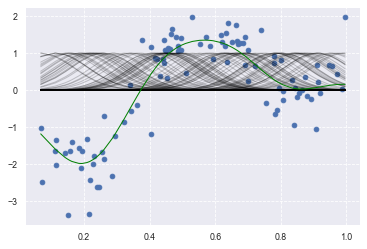

In [7]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)

#clf = LinearRegression()
clf = Ridge(alpha=30)
clf.fit(kx, target)

p_ridge = clf.predict(kx)

plt.scatter(data, target,label='data')
for i in range(len(kx)):
    plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, label='rbf', alpha=0.2)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression')
#plt.legend()

print(clf.score(kx, target))

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

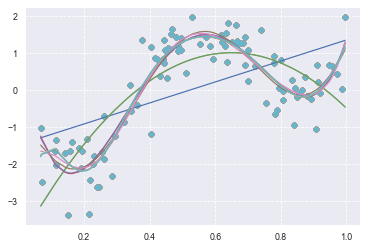

In [9]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))

### L1/Lasso正則化

`alpha=10000, max_iter=1000`

-2.220446049250313e-16


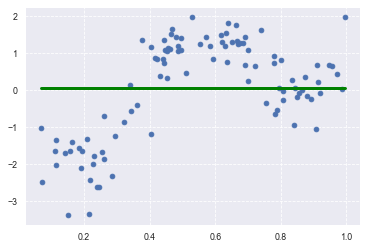

In [10]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

`alpha=0.1, max_iter=1000`

0.5637491681049012


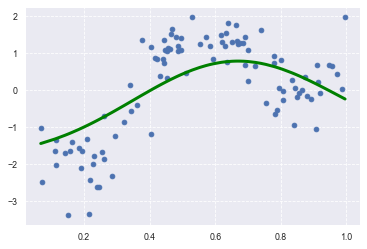

In [25]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=0.1, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

`alpha=0.001, max_iter=1000`

0.826030576384254


c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1241645812988281, tolerance: 0.01753048598766327
  positive)


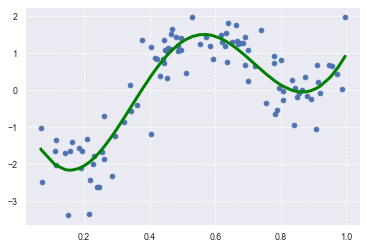

In [29]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=0.001, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

`alpha=0.001, max_iter=100000`

0.824934881984398


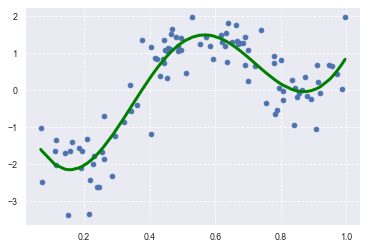

In [31]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=0.001, max_iter=100000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

## SVM

c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


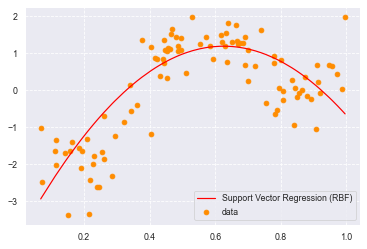

In [11]:
# from sklearn import cross_validation, preprocessing, linear_model, svm
from sklearn import preprocessing, linear_model, svm

# SVR-rbf
clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
clf_svr.fit(data, target)
y_rbf = clf_svr.fit(data, target).predict(data)
 
# plot

plt.scatter(data, target, color='darkorange', label='data')
plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF)')
plt.legend()
plt.show()

## DLによる非線形回帰 (Keras)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

In [15]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

# モデルの出力先パスを指定
import os
model_dir = './out/checkpoints/'
if os.path.exists(model_dir) == False:os.mkdir(model_dir)
cb_cp = ModelCheckpoint('./out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='./out/tensorBoard', histogram_freq=0)

# relu_reg_model を定義 (下記関数を追加)
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [16]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

Epoch 1/100
 1/18 [>.............................] - ETA: 0s - loss: 1.8588WARNING:tensorflow:From c:\users\yoshi\anaconda3\envs\e-shikaku\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
17/18 [===========================>..] - ETA: 0s - loss: 1.9043
Epoch 00001: saving model to ./out/checkpoints\weights.01-0.93.hdf5
18/18 [==============================] - 1s 71ms/step - loss: 1.8831 - val_loss: 0.9337
Epoch 2/100
18/18 [==============================] - ETA: 0s - loss: 1.5567
Epoch 00002: saving model to ./out/checkpoints\weights.02-1.10.hdf5
18/18 [==============================] - 1s 34ms/step - loss: 1.5567 - val_loss: 1.0956
Epoch 3/100
16/18 [=========================>....] - ETA: 0s - loss: 1.2650
Epoch 00003: saving model to ./out/checkpoints\weights.03-0.71.hdf5
18/18 [=========================

Epoch 34/100
17/18 [===========================>..] - ETA: 0s - loss: 0.4577
Epoch 00034: saving model to ./out/checkpoints\weights.34-0.26.hdf5
18/18 [==============================] - 1s 30ms/step - loss: 0.4409 - val_loss: 0.2605
Epoch 35/100
17/18 [===========================>..] - ETA: 0s - loss: 0.4322
Epoch 00035: saving model to ./out/checkpoints\weights.35-0.50.hdf5
18/18 [==============================] - 1s 29ms/step - loss: 0.4365 - val_loss: 0.4976
Epoch 36/100
18/18 [==============================] - ETA: 0s - loss: 0.5815
Epoch 00036: saving model to ./out/checkpoints\weights.36-0.18.hdf5
18/18 [==============================] - 1s 30ms/step - loss: 0.5815 - val_loss: 0.1793
Epoch 37/100
16/18 [=========================>....] - ETA: 0s - loss: 0.4164
Epoch 00037: saving model to ./out/checkpoints\weights.37-0.19.hdf5
18/18 [==============================] - 1s 29ms/step - loss: 0.4189 - val_loss: 0.1948
Epoch 38/100
16/18 [=========================>....] - ETA: 0s - loss

18/18 [==============================] - 2s 118ms/step - loss: 0.3728 - val_loss: 0.2550
Epoch 69/100
18/18 [==============================] - ETA: 0s - loss: 0.3767
Epoch 00069: saving model to ./out/checkpoints\weights.69-0.38.hdf5
18/18 [==============================] - 2s 108ms/step - loss: 0.3767 - val_loss: 0.3807
Epoch 70/100
18/18 [==============================] - ETA: 0s - loss: 0.7106
Epoch 00070: saving model to ./out/checkpoints\weights.70-0.22.hdf5
18/18 [==============================] - 2s 121ms/step - loss: 0.7106 - val_loss: 0.2215
Epoch 71/100
18/18 [==============================] - ETA: 0s - loss: 0.4056
Epoch 00071: saving model to ./out/checkpoints\weights.71-0.21.hdf5
18/18 [==============================] - 2s 100ms/step - loss: 0.4056 - val_loss: 0.2130
Epoch 72/100
18/18 [==============================] - ETA: 0s - loss: 0.3647
Epoch 00072: saving model to ./out/checkpoints\weights.72-0.12.hdf5
18/18 [==============================] - 2s 97ms/step - loss: 0.

In [17]:
y_pred = estimator.predict(x_train)

18/18 [==============================] - 0s 3ms/step


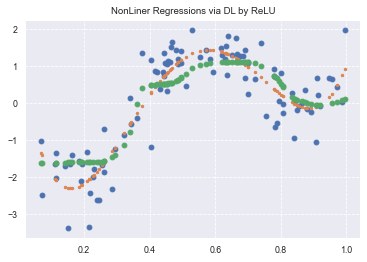

In [18]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

In [19]:
print(lasso_clf.coef_)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


# 考察

L1/Lasso正則化のパラメータを変更して、挙動の違いを確認した。

複雑さの度合いを制御するパラメータ`alpha`のデフォルトは1.0。1以上にすることは、表現力を著しく低下させるため、おそらく基本的に想定されていないのではと感じた（変更前は極端に大きかった）。

`alpha`を小さくし、`max_iter`を据え置いた場合は、下記のようなエラーとなる。

> Objective did not converge. You might want to increase the number of iterations.


参考情報：[Pythonで始める機械学習の学習](https://nozma.github.io/ml_with_python_note/2-5-%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A02-%E7%B7%9A%E5%BD%A2%E3%83%A2%E3%83%87%E3%83%AB.html)